In [10]:
# importing dependencies

import pandas as pd
import datetime as dt
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
# reading CSV data

df = pd.read_csv('C:/Users/sweir/OneDrive/Desktop/Analysis Projects/Crude_Oil_Price_Projection/Resources/clean_datasets/Cleaned_Crude_Oil_Dataset.csv')
df.head()

,Date,U.S. Field Production of Crude Oil (1k Bar.),Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,"Cushing, OK Crude Oil Future Contract 1 ($/Bar.)","Cushing, OK Crude Oil Future Contract 2 ($/Bar.)","Cushing, OK Crude Oil Future Contract 3 ($/Bar.)","Cushing, OK Crude Oil Future Contract 4 ($/Bar.)","Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,Jan-1986,283248,12583,15459,14639,820,81.4,23.0,22.4,21.9,21.7,22.9
1,Feb-1986,256855,12068,15485,14538,947,77.9,15.5,15.7,15.8,15.9,15.5
2,Mar-1986,279413,11759,15485,14517,968,75.9,12.6,13.0,13.1,13.3,12.6
3,Apr-1986,265917,12603,15473,14550,923,81.5,12.8,12.6,12.6,12.6,12.8
4,May-1986,273964,13314,15484,14805,679,86.0,15.3,14.8,14.4,14.3,15.4


In [12]:
df.dtypes

Date                                                                object
U.S. Field Production of Crude Oil (1k Bar.)                         int64
Gross Inputs to Refineries (1k Bar./Day)                             int64
Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day)      int64
Operating Crude Oil Distillation Capacity (1k Bar./Day)              int64
Idle Crude Oil Distillation Capacity (1k Bar./Day)                   int64
Percent Utilization of Refinery Operable Capacity                  float64
Cushing, OK Crude Oil Future Contract 1 ($/Bar.)                   float64
Cushing, OK Crude Oil Future Contract 2 ($/Bar.)                   float64
Cushing, OK Crude Oil Future Contract 3 ($/Bar.)                   float64
Cushing, OK Crude Oil Future Contract 4 ($/Bar.)                   float64
Cushing, OK WTI Spot Price FOB ($/Bar.)                            float64
dtype: object

In [13]:
# to convert the date column to type DATETIME
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
# reformatting columns

df = df.rename(columns={'Cushing, OK Crude Oil Future Contract 1 ($/Bar.)': 'FuturesPrice1', 'Cushing, OK Crude Oil Future Contract 2 ($/Bar.)': 'FuturesPrice2', 'Cushing, OK Crude Oil Future Contract 3 ($/Bar.)': 'FuturesPrice3', 'Cushing, OK Crude Oil Future Contract 4 ($/Bar.)': 'FuturesPrice4', 'U.S. Field Production of Crude Oil (1k Bar.)': 'TotalProduced'})
df.head()

,Date,TotalProduced,Gross Inputs to Refineries (1k Bar./Day),Operable Crude Oil Distillation Capacity (1k Bar./Calendar Day),Operating Crude Oil Distillation Capacity (1k Bar./Day),Idle Crude Oil Distillation Capacity (1k Bar./Day),Percent Utilization of Refinery Operable Capacity,FuturesPrice1,FuturesPrice2,FuturesPrice3,FuturesPrice4,"Cushing, OK WTI Spot Price FOB ($/Bar.)"
0,1986-01-01,283248,12583,15459,14639,820,81.4,23.0,22.4,21.9,21.7,22.9
1,1986-02-01,256855,12068,15485,14538,947,77.9,15.5,15.7,15.8,15.9,15.5
2,1986-03-01,279413,11759,15485,14517,968,75.9,12.6,13.0,13.1,13.3,12.6
3,1986-04-01,265917,12603,15473,14550,923,81.5,12.8,12.6,12.6,12.6,12.8
4,1986-05-01,273964,13314,15484,14805,679,86.0,15.3,14.8,14.4,14.3,15.4


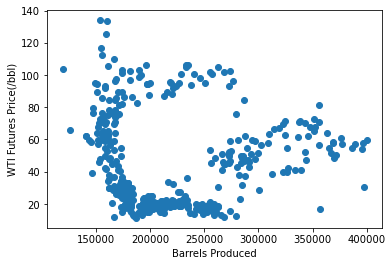

In [15]:
# initial visualization of Futures Price Data

plt.scatter(df.TotalProduced, df.FuturesPrice1)
plt.xlabel('Barrels Produced')
plt.ylabel('WTI Futures Price(/bbl)')
plt.show()

In [16]:
# creating new dataframe with ONLY Date, Production, and Futures Pricing Data
futures_prices_df = df[['Date', 'TotalProduced', 'FuturesPrice1']]
futures_prices_df.head()

,Date,TotalProduced,FuturesPrice1
0,1986-01-01,283248,23.0
1,1986-02-01,256855,15.5
2,1986-03-01,279413,12.6
3,1986-04-01,265917,12.8
4,1986-05-01,273964,15.3


In [17]:
 # setting the index for new DataFrame
futures_prices_df.set_index('Date')

,TotalProduced,FuturesPrice1
Date,,
1986-01-01,283248,23.0
1986-02-01,256855,15.5
1986-03-01,279413,12.6
1986-04-01,265917,12.8
1986-05-01,273964,15.3
...,...,...
2021-06-01,338645,71.4
2021-07-01,351228,72.4
2021-08-01,347393,67.7


In [18]:
# defining x and y vraiables for the regression model
x = futures_prices_df['TotalProduced'].values.reshape(-1, 1)
y = futures_prices_df['FuturesPrice1'].values

In [19]:
# model object creation and training  
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [20]:
# prediction generation
y_pred = model.predict(x)
print(y_pred.shape)

(430,)


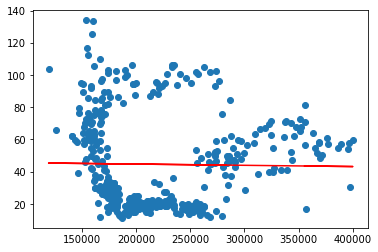

[-7.71288062e-06]
46.27123874107564


In [21]:
# model output visualization
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()
print(model.coef_)
print(model.intercept_)